# 원리

* train_test_split은 한번 나누어서 측정하는 반면, 교차검증은 데이터를 여러번 반복해서 나누고 여러 모델을 학습
* 데이터를 k개의 폴드로 나누고 하나의 폴드를 테스트 데이터, 나머지를 훈련 데이터로 사용하여 학습

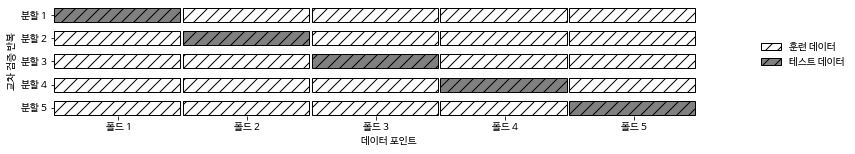

In [1]:
from ml1.preamble import*
mglearn.plots.plot_cross_validation()

# 코드

* cross_val_score

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 평균 점수:', round(scores.mean(),2))

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]
교차 검증 평균 점수: 0.97


* cross_validate을 쓰면 더 많은 정보를 볼 수 있음

In [3]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.024, 0.03 , 0.022, 0.024, 0.024]),
 'score_time': array([0.001, 0.001, 0.   , 0.   , 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [4]:
res_df = pd.DataFrame(res)
display(res_df)
display(res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.02,1.02e-03,0.97,0.97
1,0.03,9.98e-04,1.00,0.97
2,0.02,0.00e+00,0.93,0.98
3,0.02,0.00e+00,0.97,0.98
4,0.02,0.00e+00,1.00,0.97


fit_time       2.48e-02
score_time     4.04e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64

* cross_val_predict는 각 폴드가 테스트 세트일 때 예측된 값을 반환

In [5]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(logreg, iris.data, iris.target, cv=5)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 폴드 옵션

## 디폴트

* cross_val_score은 기본적으로 분류일 경우 StratifiedKFold를 사용하고 회귀일 경우 KFold를 사용함
* StratifiedKFold는 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

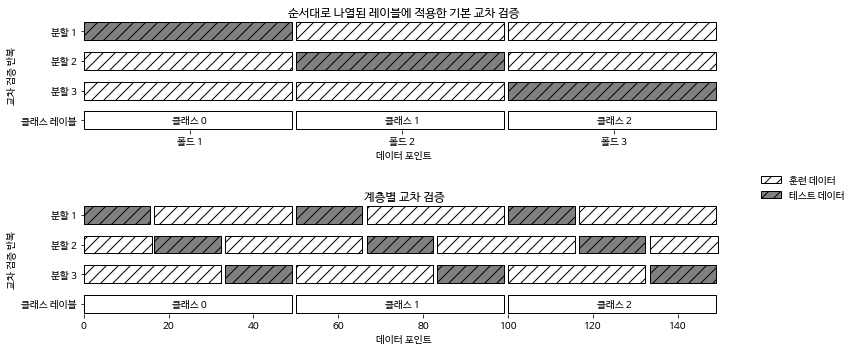

In [6]:
mglearn.plots.plot_stratified_cross_validation()

## KFold

In [11]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
print('교차 검증 점수', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 [0. 0. 0.]


=> 섞이지 않은 데이터셋을 나열 순서대로 나누므로 학습이 되지 않음

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('교차 검증 점수', cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수 [0.98 0.96 0.96]


=> 섞으니 더 좋은 결과

## LOOVC

* 폴드 하나에 샘플 하나만 들어 있는 k겹 교차검증
* 데이터셋이 작을 때 좋음

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('교차 검증 분할 횟수:', len(scores))
print('평균 정확도:', round(scores.mean(),2))

교차 검증 분할 횟수: 150
평균 정확도: 0.97


## 임의 분할 교차 검증

* train_size, test_size 만큼의 임의의 훈련 세트와 테스트 세트를 만드는 분할을 n_splits번 반복

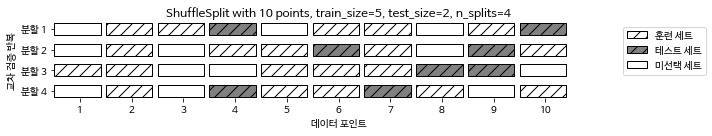

In [16]:
mglearn.plots.plot_shuffle_split()

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.987 0.947 0.973 0.96  0.973 0.973 0.973 0.973 0.973 0.973]


* 계층별 버전으로 분류 작업에 더 적합한 StratifiedShuffleSplit도 있음
* 그룹별 버전으로 GroupShuffleSplit도 있음

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=stratified_shuffle_split)
print('교차 검증 점수:', scores)

교차 검증 점수: [0.973 0.96  0.947 0.973 0.973 0.96  0.947 0.973 0.947 0.973]


## 그룹별 교차 검증

* 그룹은 하나로 취급되어 훈련 세트와 테스트 세트를 만들 때 분리되지 않음
* 새로운 그룹에 대한 예측이 중요할 때

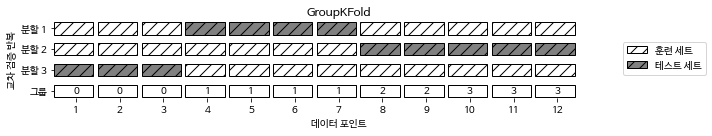

In [27]:
mglearn.plots.plot_group_kfold()

In [26]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv= GroupKFold(n_splits=3))
print('교차 검증 점수:', scores)

교차 검증 점수: [0.75  0.6   0.667]


## 반복 교차 검증

* 데이터셋이 작아 안정된 검증 점수를 얻고 싶을 때 KFold 나 Stratified의 shuffle된 것을 여러번 반복

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print('교차 검증 점수:\n', scores)
print('교차 검증 평균점수:', round(scores.mean(),2))

교차 검증 점수:
 [1.    0.967 0.933 1.    0.933 0.967 0.967 0.933 1.    0.967 0.933 1.
 1.    0.967 0.967 0.9   1.    1.    0.933 0.967 0.933 0.967 0.967 1.
 0.967 1.    0.967 0.967 0.9   1.    0.967 0.967 0.967 0.967 0.933 0.967
 0.967 1.    1.    0.9   0.967 1.    0.9   0.967 0.967 0.9   0.967 0.967
 1.    0.967]
교차 검증 평균점수: 0.96
